<BarContainer object of 20 artists>

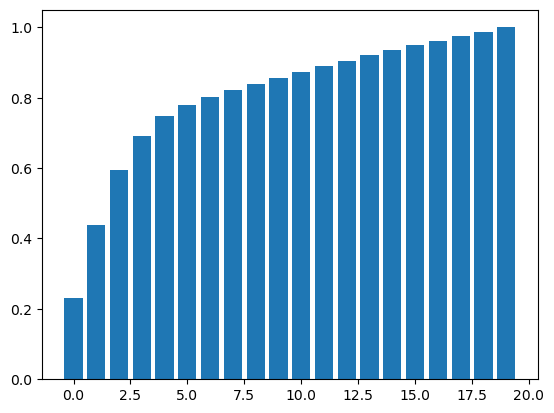

In [88]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from scipy.linalg import svd
from src.utils import Event
import numpy as np
import matplotlib.pyplot as plt


n_features = 20
evt = Event(n_features=n_features, effective_rank=3, noise_level=1)

batch1_X, batch1_y = evt.sample(n_samples=500)
batch2_X, batch2_y = evt.sample(n_samples=200)

s = svd(batch2_X)[1]

# plt.bar(range(len(s)), s)
plt.bar(range(len(s)), np.cumsum(s)/sum(s))


(-0.024226366100019794, 0.21420616292846617)

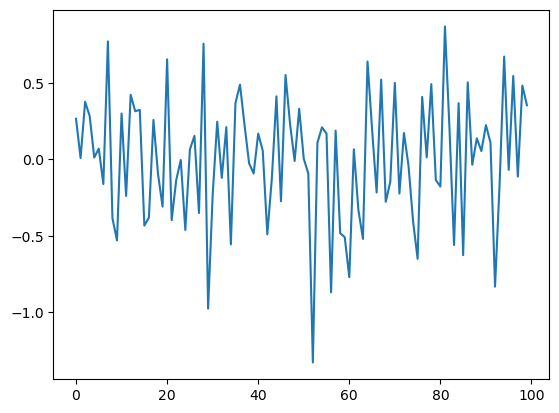

In [138]:
lr = LinearRegression()
y_hat=[]
y=[]
for i in range(100):
    batch1_X, batch1_y = evt.sample(n_samples=500)
    lr.fit(batch1_X, batch1_y)
    y_hat.append(lr.predict(batch1_X[20][np.newaxis,:]))
    y.append(batch1_y[20])
bias = [(element1 - element2) for element1, element2 in zip(y_hat, y)]
plt.plot(bias)
np.mean(bias), np.var(bias)

In [145]:
lr_ridge = Ridge(alpha=1)
y_hat=[]
y=[]
for i in range(100):
    batch1_X, batch1_y = evt.sample(n_samples=500)
    lr_ridge.fit(batch1_X, batch1_y)
    y_hat.append(lr_ridge.predict(batch1_X[20][np.newaxis,:]))
    y.append(batch1_y[20])
bias1 = [(element1 - element2) for element1, element2 in zip(y_hat, y)]
bias2 = np.mean(y_hat) - np.mean(y)
# plt.plot(bias)
bias1,bias2

([array([0.38883167]),
  array([-0.07939885]),
  array([0.34985135]),
  array([0.16181927]),
  array([-0.25267975]),
  array([-0.39559629]),
  array([-0.18082121]),
  array([-0.21189227]),
  array([0.31496603]),
  array([0.26068292]),
  array([-0.41942157]),
  array([0.70399747]),
  array([0.45874899]),
  array([0.81322528]),
  array([0.65067666]),
  array([0.39968114]),
  array([1.14816493]),
  array([0.600335]),
  array([0.03987854]),
  array([0.31437257]),
  array([-0.06759642]),
  array([0.29098012]),
  array([0.53738791]),
  array([-0.28669407]),
  array([1.07826568]),
  array([-0.39180479]),
  array([-0.19906322]),
  array([-0.35535114]),
  array([-0.08866149]),
  array([-0.52485063]),
  array([-0.05919753]),
  array([0.2613795]),
  array([0.65580651]),
  array([-0.55758418]),
  array([0.50522347]),
  array([0.06405575]),
  array([0.28709457]),
  array([-0.0007492]),
  array([-0.51443911]),
  array([0.38578383]),
  array([-0.20836905]),
  array([0.20548942]),
  array([-0.15830161

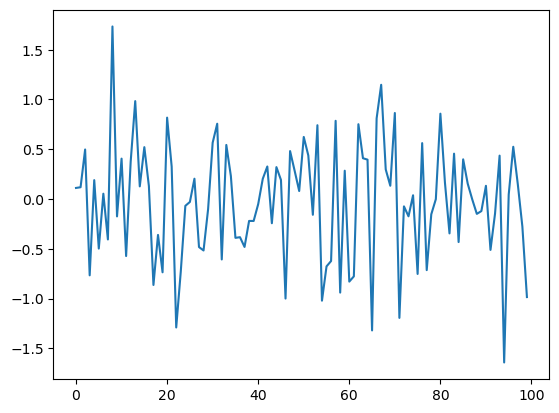

In [141]:
lr_lasso = Lasso(alpha=1)
y_hat=[]
y=[]
for i in range(100):
    batch1_X, batch1_y = evt.sample(n_samples=500)
    lr_lasso.fit(batch1_X, batch1_y)
    y_hat.append(lr_lasso.predict(batch1_X[20][np.newaxis,:]))
    y.append(batch1_y[20])
bias = [(element1 - element2) for element1, element2 in zip(y_hat, y)]
plt.plot(bias)

In [102]:
a = np.array(range(10))
b = a[np.newaxis, :]
a, a.shape, b, b.shape

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 (10,),
 array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 (1, 10))

In [ ]:
def compute(model, evt:Event, n_times, n_samples, X0):
    evt.sample(n_samples=n_samples)
    model.fit()